In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import matplotlib
import pandas as pd
import textwrap
COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
greens = ["#004225", "#529471", "#48b5c4", "#529471"]

plt.rcParams.update(matplotlib.rcParamsDefault)


In [2]:
results_path = "/Volumes/noamaz/modularity/digits/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "digits"
num_layers = '3'
n_features = 3
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"digits_{num_layers}_layers"
plot_path = f"{local_base_path}/plots/digits_multi_arch/{res_folder}"


In [3]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = "2023-11-26-13-45-59_all_results_from_teach_archs_results_with_motifs_1000_ep_no_duplicates_fixed.csv"
lgbm_folder_name = 'exp_2023_11_27_11_00_0_nice_features'

In [4]:
first_analsis_res_folder_ergm = f"{results_path}/{res_folder}/ergm/3_features/per_dim_results/first_analysis_results"
first_analsis_file_name_ergm = "2023-11-30-11-23-40_all_results_from_ergm_3_features_per_dim_results_with_motifs_2000_ep_no_duplicates.csv"

first_analsis_ergm = pd.read_csv(f"{first_analsis_res_folder_ergm}/{first_analsis_file_name_ergm}")

In [5]:
first_analsis_file_name_ergm_random_init = "2023-12-02-10-51-30_all_results_from_ergm_3_features_per_dim_results_with_motifs_2000_ep_no_duplicates_random_init.csv"

first_analsis_ergm_random_init = pd.read_csv(f"{first_analsis_res_folder_ergm}/{first_analsis_file_name_ergm_random_init}")

In [6]:
first_analsis_res_folder_genet = f"{results_path}/{res_folder}/requiered_features_genetic_models/3_features/good_archs/per_dim_results/first_analysis_results"
first_analsis_file_name_genet = "2023-12-02-17-27-43_all_results_from_requiered_features_genetic_models_3_features_good_archs_per_dim_results__with_motifs_2000_ep_no_duplicates_1s.csv"
first_analsis_genet = pd.read_csv(f"{first_analsis_res_folder_genet}/{first_analsis_file_name_genet}")

In [7]:
first_analsis_orig = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
ranges = np.linspace(0, 1, 11)
performances_q = (
    first_analsis_orig['mean_performance'].quantile(ranges[-2]),
    first_analsis_orig['mean_performance'].quantile(ranges[-1]))

In [8]:
first_analsis_orig_top = first_analsis_orig[first_analsis_orig['mean_performance'] >= performances_q[0]]

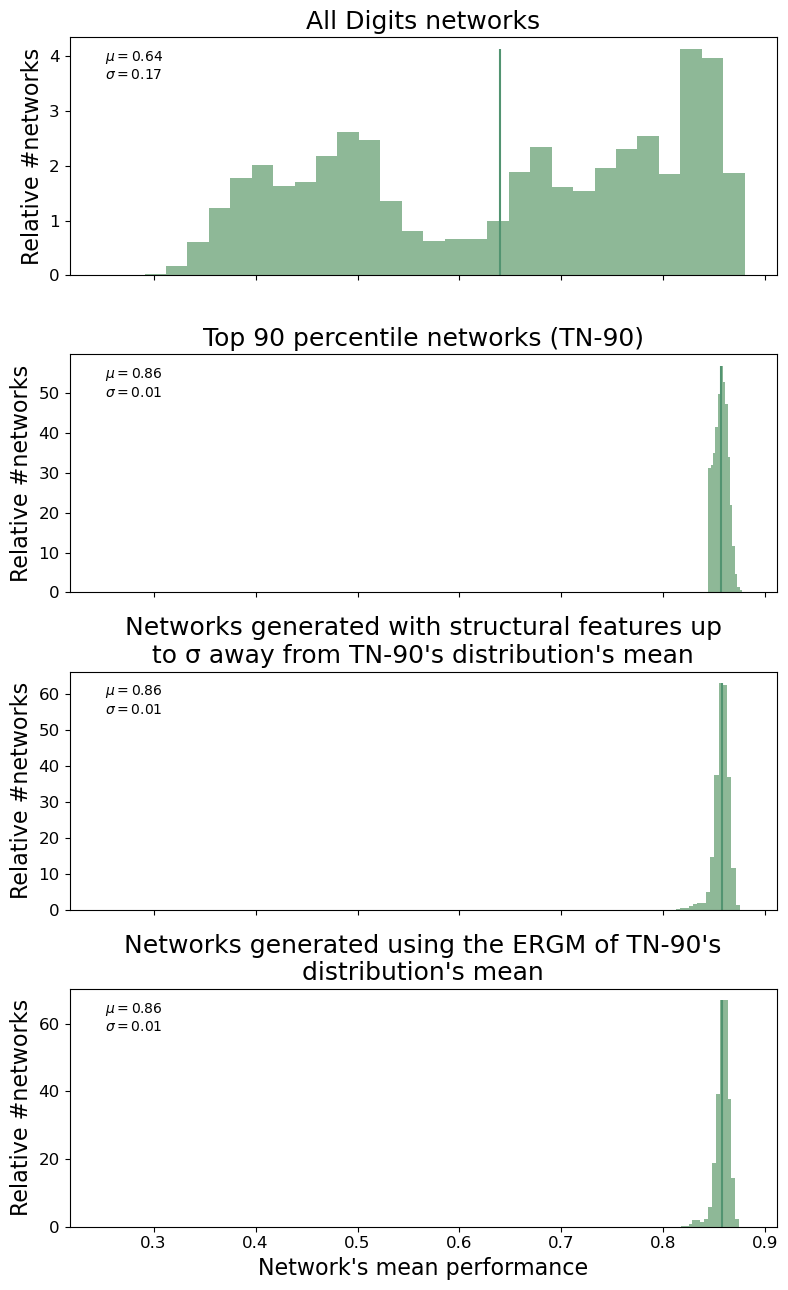

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 13), sharex='all')

n1, bins, patches = ax1.hist(first_analsis_orig['mean_performance'], color=COLORS[3],  density=True, bins=30,)
ax1.vlines(first_analsis_orig['mean_performance'].mean(), ymin=0, ymax=max(n1),  colors=greens[1])
ax1.set_title("All Digits networks", fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_orig['mean_performance'].mean(),),
        r'$\sigma=%.2f$' % (first_analsis_orig['mean_performance'].std(),)))
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=10,                   verticalalignment='top', )

n2, bins, patches = ax2.hist(first_analsis_orig_top['mean_performance'], color=COLORS[3],  density=True, bins=15,)
ax2.vlines(first_analsis_orig_top['mean_performance'].mean(), ymin=0, ymax=max(n2),  colors=greens[1])
ax2.set_title("Top 90 percentile networks (TN-90)", fontsize=18)
ax2.set_title("Top 90 percentile networks (TN-90)", fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_orig_top['mean_performance'].mean(),),
        r'$\sigma=%.2f$' % (first_analsis_orig_top['mean_performance'].std(),)))
ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=10,                   verticalalignment='top', )

n3, bins, patches = ax3.hist(first_analsis_genet['mean_performance'], color=COLORS[3],  density=True, bins=15,)
ax3.vlines(first_analsis_genet['mean_performance'].mean(), ymin=0, ymax=max(n3),  colors=greens[1])
ax3.set_title("Networks generated with structural features up\nto \u03C3 away from TN-90's distribution's mean", fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_genet['mean_performance'].mean(),),
        r'$\sigma=%.2f$' % (first_analsis_genet['mean_performance'].std(),)))
ax3.text(0.05, 0.95, textstr, transform=ax3.transAxes, fontsize=10,                   verticalalignment='top', )

n4, bins, patches =  ax4.hist(first_analsis_ergm_random_init['mean_performance'], color=COLORS[3],  density=True, bins=15,)
ax4.vlines(first_analsis_ergm_random_init['mean_performance'].mean(), ymin=0, ymax=max(n4), colors=greens[1])
ax4.set_title("Networks generated using the ERGM of TN-90's\ndistribution's mean",fontsize=18)
textstr = '\n'.join((
        r'$\mu=%.2f$' % (first_analsis_ergm_random_init['mean_performance'].mean(),),
        r'$\sigma=%.2f$' % (first_analsis_ergm_random_init['mean_performance'].std(),)))
ax4.text(0.05, 0.95, textstr, transform=ax4.transAxes, fontsize=10,                   verticalalignment='top', )

#ax4.set_yticks(np.arange(max(n4)+1)[::5])
ax4.set_xlabel("Network's mean performance", fontsize=16)
ax1.set_ylabel('Relative #networks', fontsize=16)
ax2.set_ylabel('Relative #networks', fontsize=16)
ax3.set_ylabel('Relative #networks', fontsize=16)
ax4.set_ylabel('Relative #networks', fontsize=16)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_ergm_vs_other_distd.png", dpi=300)
plt.show()

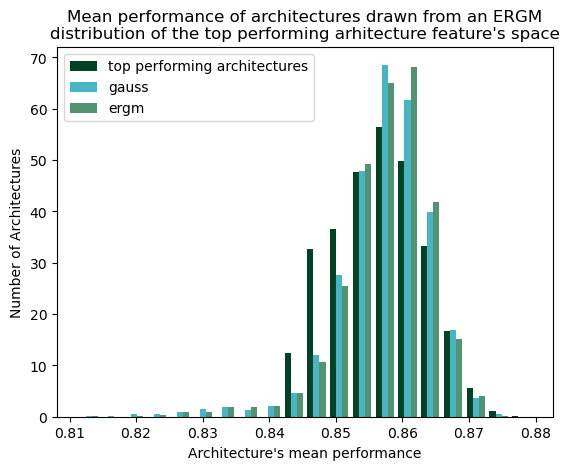

In [10]:
plt.figure()
plt.hist([first_analsis_orig_top['mean_performance'],first_analsis_genet['mean_performance'], first_analsis_ergm['mean_performance']], density=True, bins=20,
         label=['top performing architectures', 'gauss', 'ergm'], color=[greens[0], greens[2], greens[1]])
plt.legend()
plt.xlabel("Architecture's mean performance")
plt.ylabel('Number of Architectures')
plt.title(
    "Mean performance of architectures drawn from an ERGM\ndistribution of the top performing arhitecture feature's space")
#plt.savefig(f"{local_base_path}/plots/for_poster/retina_{num_layers}_layers_{dim1}_{dim2}/gentic_vs_original.png"
            #)
plt.show()

In [11]:
features_values_folder = f"{results_path}/{res_folder}/generated_archs"

db_feature_values_csv_name = '2023-12-02-13-45-24_feature_values_full_db.csv'
db_feature_values = pd.read_csv(f"{features_values_folder}/{db_feature_values_csv_name}").drop("Unnamed: 0", axis=1,
                                                                                               errors='ignore')

ergm_feature_values_csv_name = '2023-12-02-13-45-24_feature_values_ergm.csv'
ergm_feature_values = pd.read_csv(f"{features_values_folder}/{ergm_feature_values_csv_name}").drop("Unnamed: 0", axis=1,
                                                                                                   errors='ignore')

ergm_random_init_feature_values_csv_name = '2023-12-02-13-45-24_feature_values_ergm_random_init.csv'
ergm_random_init_feature_values = pd.read_csv(
    f"{features_values_folder}/{ergm_random_init_feature_values_csv_name}").drop("Unnamed: 0", axis=1, errors='ignore')

gen_feature_values_csv_name = '2023-12-02-16-11-25_feature_values_genet_1s.csv'
gen_feature_values = pd.read_csv(f"{features_values_folder}/{gen_feature_values_csv_name}").drop(
    "Unnamed: 0", axis=1,
    errors='ignore')


In [12]:
feature_names = list(db_feature_values.columns)
data = [
    db_feature_values,
    gen_feature_values,
    #ergm_feature_values,
    ergm_random_init_feature_values,
]
labels = [
    'TN-90',
    'MG sampling',
    'ERGM sampling',
   # 'ergm based sampling (random_init)',
]

<Figure size 640x480 with 0 Axes>

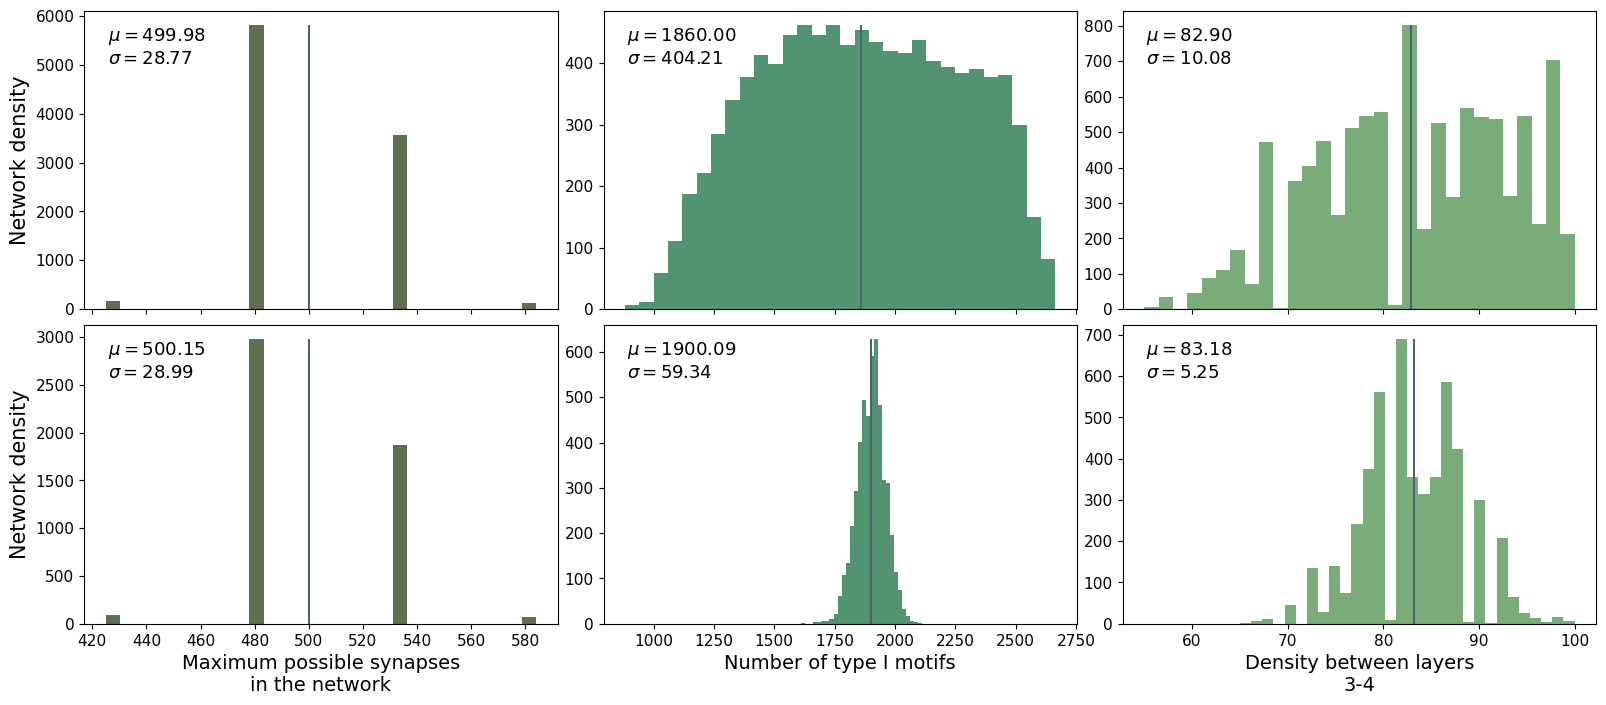

In [13]:
sorted_greens = [ '#8EB897',  "#529471",  "#004225"]
num_columns = len(feature_names)
feature_names = list(db_feature_values.columns)
feature_names = sorted(feature_names)
data = [
    db_feature_values,
   ergm_random_init_feature_values,
]
labels = [
    'TN-90',
    'ERGM sampling',
]
plt.figure()
fig, axs = plt.subplots(2,num_columns , figsize=(16, 7), sharex='col', )
min_x = 1.0
max_x = 0
idxs = []
stds = [
    [] for _ in labels
]
varss = [
    [] for _ in labels
]
sorted_greens = ["#5F6F52",
                  "#529471",
                 "#79AC78",
                 "#D2E3C8", ]
params ={
        'max_possible_connections': 'Maximum possible synapses in the network',
        'total_connectivity_ratio_between_layers_2': 'Density between layers 3-4',
        'motifs_count_1': "Number of type I motifs",
    }
nums = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I'], ['J', 'K', 'L'], ['M', 'N', 'O'], ['P','K','R'], ]
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (i, j) in enumerate(idxs):
    f_name = feature_names[j]
    n, p, t = axs[i, j].hist(data[i][f_name], bins=30, color=sorted_greens[j])
    axs[i, j].vlines(data[i][f_name].mean(), ymin=0, ymax=max(n), colors=COLORS[0],)
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (data[i][f_name].mean(),),
        r'$\sigma=%.2f$' % (data[i][f_name].std(),)))
    stds[i].append(data[i][f_name].std())
    varss[i].append(data[i][f_name].var())

    axs[i, j].text(0.05, 0.95, textstr, transform=axs[i, j].transAxes, fontsize=13,
                   verticalalignment='top', )
    axs[i, 0].set_ylabel(textwrap.fill('Network density', width=20,
                                       break_long_words=False), fontsize=15, )
    axs[i, j].tick_params(axis='both', labelsize=11)
    fig.align_ylabels(axs[j:])
for i, l in enumerate(feature_names):
    l = params[l]
    axs[1, i].set_xlabel(textwrap.fill(l,width=25,
                                       break_long_words=False), fontsize=14, )
fig.tight_layout(pad=0.5)
plt.savefig(
    f"{plot_path}/{time_str}_{task}_ergm_vs_other_distd_random_init_feature_dist.png",  bbox_inches='tight')
plt.show()

In [15]:
j = 0
for i in range(len(feature_names)):
    print(feature_names[i], round(varss[1][i]/varss[0][i], 3))
    j += varss[1][i]/varss[0][i]

max_possible_connections 1.015
motifs_count_1 0.022
total_connectivity_ratio_between_layers_2 0.271


In [16]:
j/3

0.4359003929898944

In [15]:
round(np.mean([ stds[-1][i] /stds[0][i] for i in [1,2]]), 2)


0.33

In [16]:
print('ergm')
round(np.mean([ varss[-1][i] /varss[0][i] for i in [1,2]]), 2)


ergm


0.15

In [17]:

print('mg')
round(np.mean([ varss[-2][i] /varss[0][i] for i in [1,2]]), 2)


mg


0.06

In [43]:
round(np.mean([ varss[-2][i] /varss[0][i] for i in [1,2]]), 2)

-0.94

In [36]:
[ varss[-2][i] /varss[0][i] for i in [1,2]]

[0.06677905184981286, 0.04551237535914712]

In [39]:
[ varss[-1][i] /varss[0][i] for i in [1,2]]

[0.2712427989172022, 0.02155123917899739, 1.0149071408735832]